In [79]:
# Running the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


In [3]:
# Importing the file into Pandas
file_one = "data/Mouse_metadata.csv"
file_two = "data/Study_results.csv"

In [4]:
# Reading the csv files
file_one_df = pd.read_csv(file_one)
file_two_df = pd.read_csv(file_two)
file_two_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mouse ID             1893 non-null   object 
 1   Timepoint            1893 non-null   int64  
 2   Tumour Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites     1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
# Merging the two files and forming the new data file
merge_df = pd.merge(file_one_df, file_two_df, on="Mouse ID")
merge_df.head()
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mouse ID             1893 non-null   object 
 1   Drug Regimen         1893 non-null   object 
 2   Sex                  1893 non-null   object 
 3   Age_months           1893 non-null   int64  
 4   Weight (g)           1893 non-null   int64  
 5   Timepoint            1893 non-null   int64  
 6   Tumour Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites     1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Changing the header of the columns with new names
merge_df = pd.DataFrame(merge_df)
merge_df = merge_df.rename(
    columns={"Mouse ID": "Mouse_ID",
            "Drug Regimen": "Drug_Regimen",
            "Weight (g)": "Weight_g",
            "Tumour Volume (mm3)":"Tumour_Volum_mm3",
            "Metastatic Sites": "Metastatic_Sites"})
merge_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumour_Volum_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the unique number of each columns
ID_check = merge_df.Mouse_ID.unique()
print(len(ID_check))
Age_check = merge_df.Age_months.unique()
print(len(Age_check))
Time_check = merge_df.Timepoint.unique()
print(len(Time_check))


249
24
10


In [8]:
# Check which Mouse ID has a duplicated values
merge_df_2 = merge_df.loc[merge_df.duplicated(subset=["Mouse_ID", "Timepoint"]),"Mouse_ID"].unique()
merge_df_2

array(['g989'], dtype=object)

In [9]:
# Creating a new data frame that removes the duplicate
merge_df_3 = merge_df.loc[(merge_df["Mouse_ID"] != "g989")]
merge_df_3

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumour_Volum_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Check again if that Mouse ID has been removed or not
ID_check_2 = merge_df_3.Mouse_ID.unique()
print(len(ID_check_2))
Age_check_2 = merge_df_3.Age_months.unique()
print(len(Age_check_2))
Time_check_2 = merge_df_3.Timepoint.unique()
print(len(Time_check_2))

248
24
10


In [11]:
# Calculations for the statistical parameters
Regimen_mean = merge_df_3.groupby(["Drug_Regimen"]).mean()
Regimen_median = merge_df_3.groupby(["Drug_Regimen"]).median()
Regimen_var = merge_df_3.groupby(["Drug_Regimen"]).var()
Regimen_std = merge_df_3.groupby(["Drug_Regimen"]).std()
Regimen_sem = merge_df_3.groupby(["Drug_Regimen"]).sem()
# Regimen_mean
# Regimen_median
# Regimen_sem
# Regimen_std
# Regimen_var

C:\Users\user\AppData\Local\Temp\ipykernel_6468\148687231.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Regimen_mean = merge_df_3.groupby(["Drug_Regimen"]).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_6468\148687231.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Regimen_median = merge_df_3.groupby(["Drug_Regimen"]).median()
C:\Users\user\AppData\Local\Temp\ipykernel_6468\148687231.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shou

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = merge_df_3.loc[(merge_df_3["Drug_Regimen"] == "Capomulin") | (merge_df_3["Drug_Regimen"] == "Ramicane") | (merge_df_3["Drug_Regimen"] == "Infubinol") | (merge_df_3["Drug_Regimen"] == "Ceftamin")]
final_tumor_2 = merge_df_3.sort_values(by=['Timepoint'], ascending=True)
final_tumor_2
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_3 = final_tumor_2.groupby("Mouse_ID")[["Tumour_Volum_mm3", "Timepoint"]].last()
final_tumor_3

,Tumour_Volum_mm3,Timepoint
Mouse_ID,,
a203,67.973419,45
a251,65.525743,45
a262,70.717621,45
a275,62.999356,45
a366,63.440686,30
...,...,...
z435,48.710661,10
z578,30.638696,45
z581,62.754451,45


In [76]:
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merge_df_4 = pd.merge(merge_df_3, final_tumor_3, on= "Mouse_ID")
merge_df_4
merge_df_4 = pd.DataFrame(merge_df_4)
merge_df_4 = merge_df_4.rename(
    columns={"Timepoint_x": "Timepoint",
            "Tumour_Volum_mm3_x": "Tumour_Volum_mm3",
            "Tumour_Volum_mm3_y":"Max_Tumour_Volum_mm3",
            "Timepoint_y": "Max_Timepoint"})
merge_df_4

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumour_Volum_mm3,Metastatic_Sites,Max_Tumour_Volum_mm3,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126,45
...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,73.867845,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,73.867845,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,73.867845,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,73.867845,45


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = merge_df_4["Drug_Regimen"].unique()
treatment

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [87]:
# Create empty list to fill with tumour vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1=merge_df_4.quantile(0.25)
Q3 = merge_df_4.quantile(0.75)
IQR = Q3-Q1
IQR

C:\Users\user\AppData\Local\Temp\ipykernel_6468\219823949.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=merge_df_4.quantile(0.25)
C:\Users\user\AppData\Local\Temp\ipykernel_6468\219823949.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = merge_df_4.quantile(0.75)


Age_months              12.250000
Weight_g                 4.000000
Timepoint               25.000000
Tumour_Volum_mm3        11.324075
Metastatic_Sites         2.000000
Max_Tumour_Volum_mm3    20.988276
Max_Timepoint           10.000000
dtype: float64

Text(0, 0.5, 'Max_Tumour_Volum_mm3')

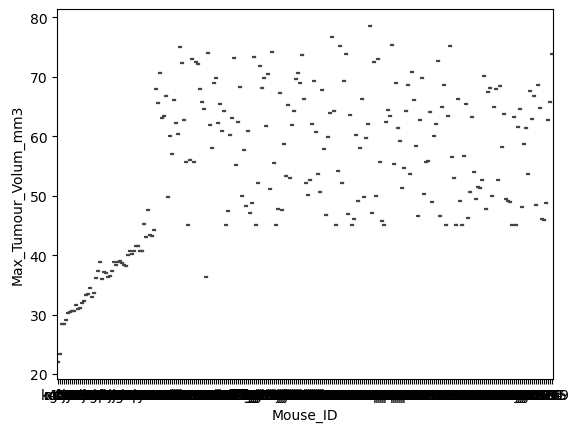

In [84]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
sns.boxplot(y='Max_Tumour_Volum_mm3', x='Mouse_ID',data=merge_df_4)
plt.xticks(rotation=0)
plt.ylabel('Max_Tumour_Volum_mm3')

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
merge_df_4 = merge_df_3.sort_values(by=['Drug_Regimen'], ascending=True)
merge_df_4


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumour_Volum_mm3,Metastatic_Sites
347,v923,Capomulin,Female,19,21,30,40.752216,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
357,g316,Capomulin,Female,22,22,30,44.221480,2
356,g316,Capomulin,Female,22,22,25,46.809225,1
355,g316,Capomulin,Female,22,22,20,45.933322,1
...,...,...,...,...,...,...,...,...
1324,o926,Zoniferol,Male,15,29,40,59.903044,3
1323,o926,Zoniferol,Male,15,29,35,58.593993,3
1322,o926,Zoniferol,Male,15,29,30,56.917398,3
591,b313,Zoniferol,Male,12,27,15,49.188387,1


In [13]:
Regimen_count = merge_df_3.groupby(["Drug_Regimen"]).count()
Regimen_count

,Mouse_ID,Sex,Age_months,Weight_g,Timepoint,Tumour_Volum_mm3,Metastatic_Sites
Drug_Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


<AxesSubplot: ylabel='Drug_Regimen'>

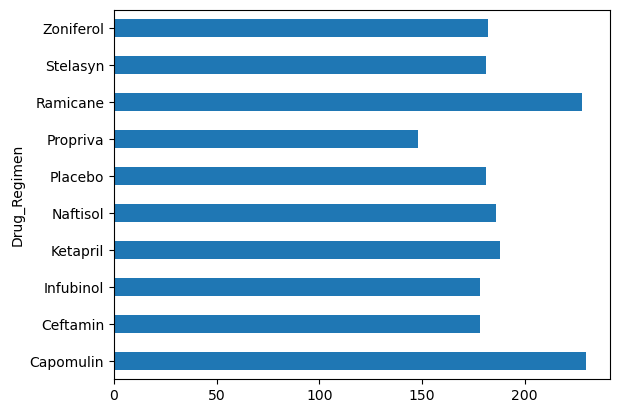

In [14]:
Regimen_count.Timepoint.plot.barh(rot=0)

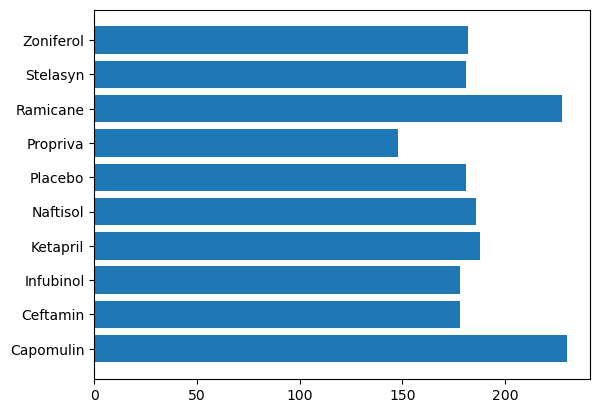

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_value = merge_df_4.Drug_Regimen.unique()
y_value = Regimen_count.iloc[:,4]
plt.barh(x_value, y_value)
plt.show()

In [16]:
male = merge_df_3.loc[(merge_df_3["Sex"] == "Male")]
male
female = merge_df_3.loc[(merge_df_3["Sex"] == "Female")]
female

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumour_Volum_mm3,Metastatic_Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
1878,z795,Naftisol,Female,13,29,25,57.947100,2
1879,z795,Naftisol,Female,13,29,30,59.789636,2
1880,z795,Naftisol,Female,13,29,35,60.435654,2
1881,z795,Naftisol,Female,13,29,40,62.376639,3


In [17]:
sizes = [len(male), len(female)]
explode = (0.1, 0)
labels = ["Male", "Female"]
colours = ["blue", "red"]

([<matplotlib.patches.Wedge at 0x2674c6de910>,
 [Text(-0.7433500820741923, -0.942035379102235, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.43362088120994546, -0.549520637809637, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

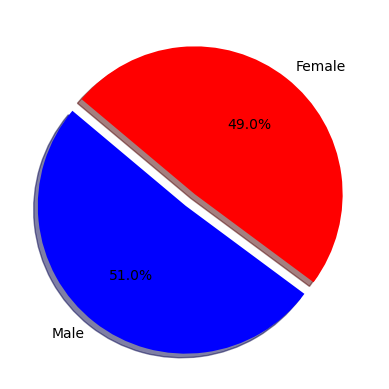

In [18]:
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [20]:
t1 = merge_df_3.groupby(["Drug_Regimen"]).max()
t1

,Mouse_ID,Sex,Age_months,Weight_g,Timepoint,Tumour_Volum_mm3,Metastatic_Sites
Drug_Regimen,,,,,,,
Capomulin,y793,Male,24,25,45,48.158209,3
Ceftamin,y865,Male,24,30,45,68.923185,4
Infubinol,z581,Male,24,30,45,72.226731,4
Ketapril,y260,Male,24,30,45,78.567014,4
Naftisol,z969,Male,23,30,45,76.668817,4
Placebo,y478,Male,21,30,45,73.212939,4
Propriva,z435,Male,24,30,45,72.455421,4
Ramicane,z578,Male,23,25,45,47.622816,3
Stelasyn,z314,Male,23,30,45,75.123690,4


In [21]:
Set1 = merge_df_3.loc[((merge_df_3["Drug_Regimen"]) == "Capomulin") & ((merge_df_3["Mouse_ID"]) == 'i557')]
Set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 431 to 440
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mouse_ID          10 non-null     object 
 1   Drug_Regimen      10 non-null     object 
 2   Sex               10 non-null     object 
 3   Age_months        10 non-null     int64  
 4   Weight_g          10 non-null     int64  
 5   Timepoint         10 non-null     int64  
 6   Tumour_Volum_mm3  10 non-null     float64
 7   Metastatic_Sites  10 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 720.0+ bytes


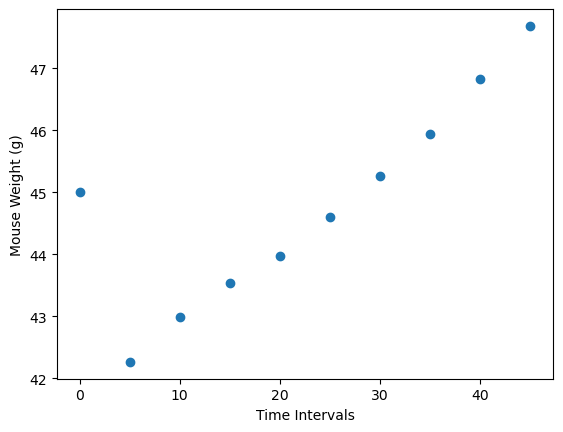

In [ ]:
plt.scatter(Set1.iloc[:,5], Set1.iloc[:,6])
plt.xlabel('Time Intervals')
plt.ylabel('Mouse Weight (g)')
plt.show()

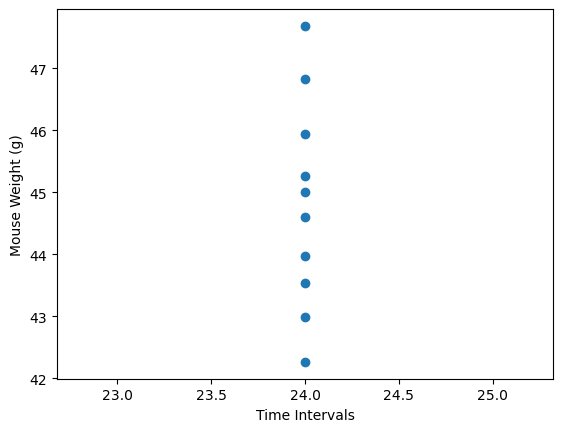

In [22]:
plt.scatter(Set1.iloc[:,4], Set1.iloc[:,6])
plt.xlabel('Time Intervals')
plt.ylabel('Mouse Weight (g)')
plt.show()

In [23]:
#tum_avg = merge_df_3.loc[((merge_df_3["Drug_Regimen"]) == "Capomulin") & (merge_df_3.Tumour_Volum_mm3.mean())]
#tum_1 = merge_df_3.iloc[:,6]
tum_2 = merge_df_3.loc[(merge_df_3["Drug_Regimen"])=="Capomulin"]
tum_2
tum_3 = tum_2.groupby(["Tumour_Volum_mm3"]).mean()
tum_3

C:\Users\user\AppData\Local\Temp\ipykernel_6468\3637124033.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tum_3 = tum_2.groupby(["Tumour_Volum_mm3"]).mean()


,Age_months,Weight_g,Timepoint,Metastatic_Sites
Tumour_Volum_mm3,,,,
23.343598,3.0,17.0,45.0,1.0
25.472143,3.0,17.0,40.0,1.0
28.167397,16.0,15.0,40.0,0.0
28.328531,3.0,17.0,35.0,1.0
28.430964,22.0,17.0,45.0,1.0
...,...,...,...,...
47.373423,12.0,25.0,15.0,0.0
47.488599,17.0,21.0,15.0,1.0
47.685963,1.0,24.0,45.0,1.0


In [24]:
mouse_Capomulin = merge_df_3.loc[(merge_df["Drug_Regimen"] == "Capomulin") & (merge_df.Mouse_ID.count())]
mouse_Capomulin
mouse_weight = mouse_Capomulin.groupby("Mouse_ID")[["Tumour_Volum_mm3", "Weight_g"]].mean()
mouse_weight


,Tumour_Volum_mm3,Weight_g
Mouse_ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


The r-squared is: 0.7088568047708723


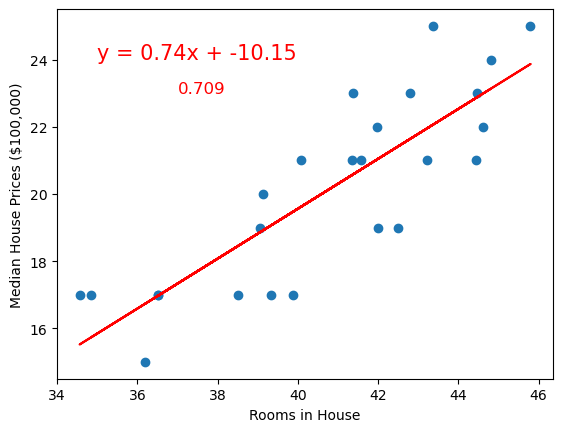

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
x_values = mouse_weight["Tumour_Volum_mm3"]
y_values = mouse_weight["Weight_g"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,24),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(round(rvalue**2,3), (37,23), fontsize=12, color="red")
plt.show()
